**M1**
1. 필요한 라이브러리 import
2. book.csv 파일을 DataFrame으로 불러옴 (df, encoding='euc-kr')
3. 데이터 정상적인 import 확인, 실 데이터 내용(구조) 파악
4. 각 컬럼 정의
5. 데이터 각 컬럼별 데이터 타입과 결측치 여부 확인
6. 기초 통계량 확인
7. 'Pdatae' 컬럼의 데이터 타입을 날짜 타입으로 변환
8. 연도별 출판물 수 계산, 시각화

In [ ]:
# 한글 깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic') <-- 시각화 시 사용

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('/content/book.csv', encoding='euc-kr')
# df = pd.read_csv('./book.csv', encoding='euc-kr')

# 3. 데이터 정상적인 import 확인, 실 데이터 내용(구조) 파악
# 상위 5개 행 확인
print(df.head())


   Unnamed: 0        ID Title  Rating Author Price Pdate Publisher Btype  \
0           0  97006285   NaN     NaN    NaN   NaN   NaN       NaN   new   
1           1  97006286   NaN     NaN    NaN   NaN   NaN       NaN   new   
2           2  97006287   NaN     NaN    NaN   NaN   NaN       NaN   new   
3           3  97006288   NaN     NaN    NaN   NaN   NaN       NaN   new   
4           4  97006289   NaN     NaN    NaN   NaN   NaN       NaN   new   

   Salseindex  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
print(df.tail())

4. 각 컬럼 정의
    Title : 책 제목
    ....
    Pdate : 출판일

In [ ]:
# 5. 데이터 각 컬럼별 데이터 타입과 결측치 여부 확인

# 데이터 정보 확인
print(df.info())

# price ???
# pdate ???

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33303 entries, 0 to 33302
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  33303 non-null  int64         
 1   ID          33303 non-null  int64         
 2   Title       25082 non-null  object        
 3   Rating      791 non-null    float64       
 4   Author      21434 non-null  object        
 5   Price       22814 non-null  float64       
 6   Pdate       24651 non-null  object        
 7   Publisher   24564 non-null  object        
 8   Btype       33303 non-null  object        
 9   Salseindex  812 non-null    float64       
 10  Pdatae      0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 2.8+ MB
None


In [ ]:
# price  object => 수치형
# 'Price' 컬럼을 수치형으로 변환
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')

# 변환 후 데이터 타입 확인
print(df['Price'].dtypes)

# 기초 통계량 다시 확인
print(df['Price'].describe())

float64
count    2.281400e+04
mean     1.128600e+04
std      2.113542e+04
min      0.000000e+00
25%      4.050000e+03
50%      6.300000e+03
75%      1.140000e+04
max      1.042580e+06
Name: Price, dtype: float64


<ipython-input-48-4313df0d42b0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')


In [ ]:
# 6. 기초 통계량 확인
# 기초 통계량 확인
print(df.describe())



         Unnamed: 0            ID      Rating         Price   Salseindex
count  33303.000000  3.330300e+04  791.000000  2.281400e+04   812.000000
mean   16651.000000  9.702294e+07    9.284703  1.128600e+04   301.049261
std     9613.892344  9.616439e+03    1.135718  2.113542e+04   838.236611
min        0.000000  9.700628e+07    2.000000  0.000000e+00    12.000000
25%     8325.500000  9.701461e+07    9.000000  4.050000e+03    12.000000
50%    16651.000000  9.702294e+07    9.700000  6.300000e+03    48.000000
75%    24976.500000  9.703127e+07   10.000000  1.140000e+04   174.000000
max    33302.000000  9.703960e+07   10.000000  1.042580e+06  9393.000000


7. 'Pdatae' 컬럼의 데이터 타입을 날짜 타입으로 변환

In [ ]:

# 변환 전
# print(df['Pdate'].head())
# 'Pdate' 컬럼을 날짜 타입으로 변환 (한국어 날짜 형식에 맞춤)
df['Pdate'] = pd.to_datetime(df['Pdate'], format='%Y년 %m월 %d일', errors='coerce')
# 변환 후
# print(df['Pdate'].head())



8. 연도별 출판물 수 계산, 시각화

In [ ]:
# 연도별로 데이터 집계
df['Year'] = df['Pdate'].dt.year
yearly_counts = df.groupby('Year').size().sort_index()

# 연도별 출판물 수 시각화
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('연도별 출판물 수')
plt.xlabel('연도')
plt.ylabel('출판물 수')
plt.tight_layout()  # 레이블이 잘리지 않도록 조정
plt.show()

**M2**<br><br>
1.결측치 확인: 데이터셋에 결측치가 있는지 확인, 각 컬럼별로 결측치의 비율 계산 <br>
2.고유값 확인: 범주형 변수의 고유값과 그 개수 확인.<br>
3.상관관계 분석: 수치형 변수들 간의 상관관계를 분석.<br>
4.분포 확인: 수치형 변수의 분포를 히스토그램 or 박스 플롯 or... 확인, 분석 <br>
6.범주형 변수의 분포: 범주형 변수의 분포를 바 차트 등으로 시각화, 분포 확인, 분석 <br>
7.다변량 분석: 산점도 행렬, 페어플롯, 히트맵 등을 통해 여러 변수들 간의 관계 파악

In [ ]:

# 결측치 확인
print("결측치 확인:")
print(df.isnull().sum())

# 결측치 비율 계산
print("\n결측치 비율:")
print(df.isnull().mean() * 100)


결측치 확인:
Unnamed: 0        0
ID                0
Title          8221
Rating        32512
Author        11869
Price         10489
Pdate          8652
Publisher      8739
Btype             0
Salseindex    32491
dtype: int64

결측치 비율:
Unnamed: 0     0.000000
ID             0.000000
Title         24.685464
Rating        97.624839
Author        35.639432
Price         31.495661
Pdate         25.979641
Publisher     26.240879
Btype          0.000000
Salseindex    97.561781
dtype: float64


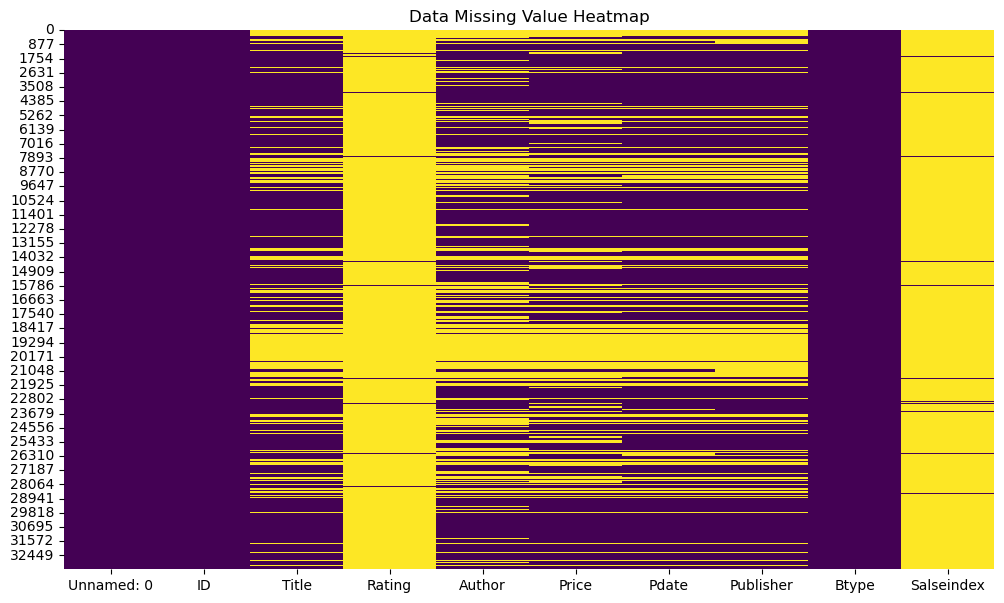

In [ ]:
# 결측치 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Data Missing Value Heatmap')

# 플롯팅
plt.show()

In [ ]:
# 결측치 처리
# 일반적인 방법이며, 실제 모델링 단계에서 적합한 결측치 처리 방법 적용
# 결측치 처리 - 평균값으로 대체
df.fillna(df.mean(), inplace=True)
# 결측치 처리 - 0으로
df = df.fillna(0)


# 'Rating'의 결측치를 평균값으로 대체
rating_mean = df[df['Rating'] != 'None']['Rating'].astype(float).mean()
df['Rating'] = df['Rating'].replace('None', rating_mean).astype(float)



# 'Price' 열에서 결측값 제거
df = df.dropna(subset=['Price'])

# 데이터프레임 전체에서 결측값이 있는 행을 제거
# df = df.dropna()


In [ ]:

# 고유값 확인
for col in df.select_dtypes(include=['object']).columns:
    print("\n" + col + " 컬럼의 고유값 개수:")
    print(df[col].nunique())



Title 컬럼의 고유값 개수:
21623

Author 컬럼의 고유값 개수:
11666

Price 컬럼의 고유값 개수:
1477

Pdate 컬럼의 고유값 개수:
4915

Publisher 컬럼의 고유값 개수:
4034

Btype 컬럼의 고유값 개수:
2


In [ ]:
# 상관관계 분석
print("\n상관관계:")
correlation_matrix = df.corr()
print(correlation_matrix)




상관관계:
            Unnamed: 0        ID    Rating  Salseindex
Unnamed: 0    1.000000  1.000000 -0.025584    0.061938
ID            1.000000  1.000000 -0.025590    0.061936
Rating       -0.025584 -0.025590  1.000000    0.121628
Salseindex    0.061938  0.061936  0.121628    1.000000


<ipython-input-4-a018f6c45bd4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


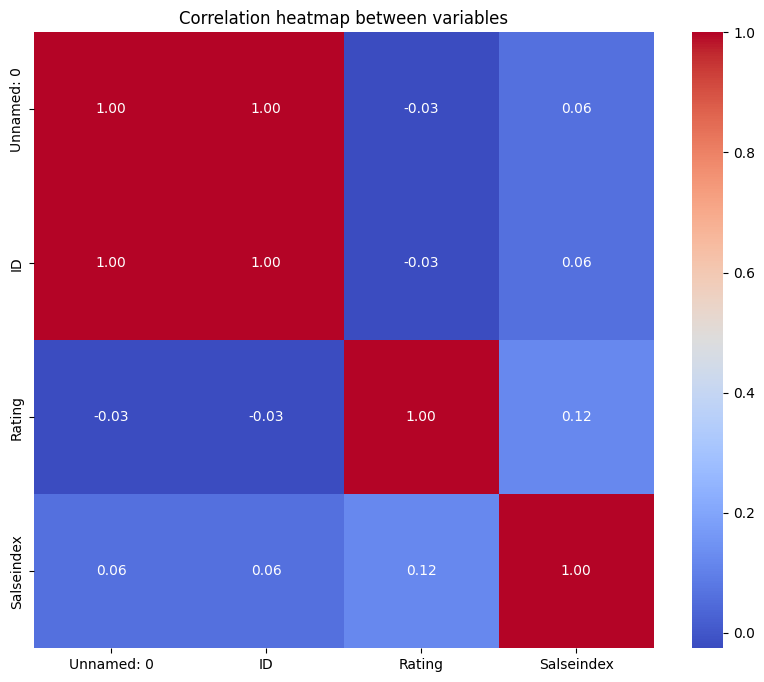

In [ ]:
# 다변량 분석 - 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap between variables")
plt.show()

In [ ]:
import seaborn as sns

# 수치형 변수 분포 확인
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(col + " distribution")
    plt.show()



In [ ]:
# 범주형 변수 분포 확인 - 범주형 변수 확인
df.select_dtypes(include=['object']).columns

Index(['Title', 'Author', 'Price', 'Pdate', 'Publisher', 'Btype'], dtype='object')

In [ ]:
# 범주형 변수 분포 확인 - Publisher

plt.figure(figsize=(10, 5))
sns.countplot(y='Publisher', data=df)
plt.title('Publisher distribution')
plt.show()


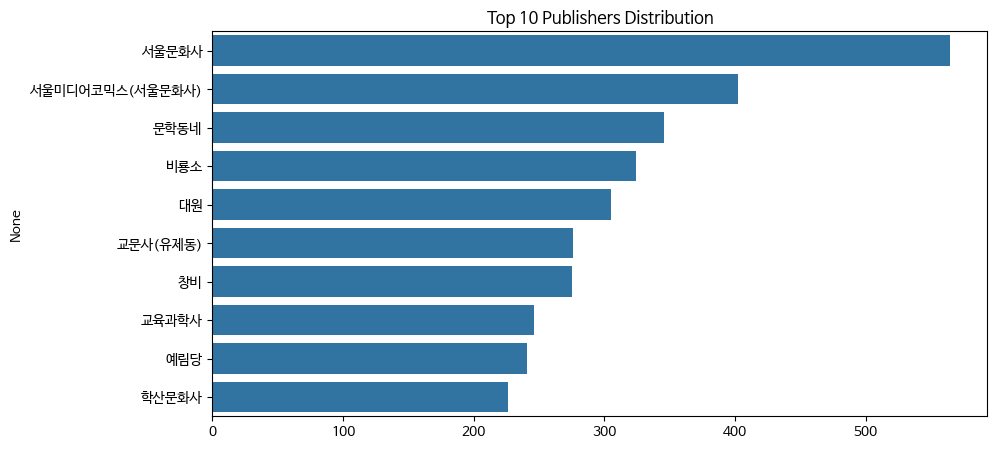

In [ ]:
plt.rc('font', family='NanumBarunGothic')
# sns.set(font="Malgun Gothic",
# rc={"axes.unicode_minus":False}, style='white')


# 범주형 변수 분포 확인 - Publisher

# 가장 많이 등장하는 상위 10개의 출판사 추출
top_publishers = df['Publisher'].value_counts().head(10)

# 상위 10개의 출판사에 대한 countplot 그리기
plt.figure(figsize=(10, 5))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title('Top 10 Publishers Distribution')
plt.show()


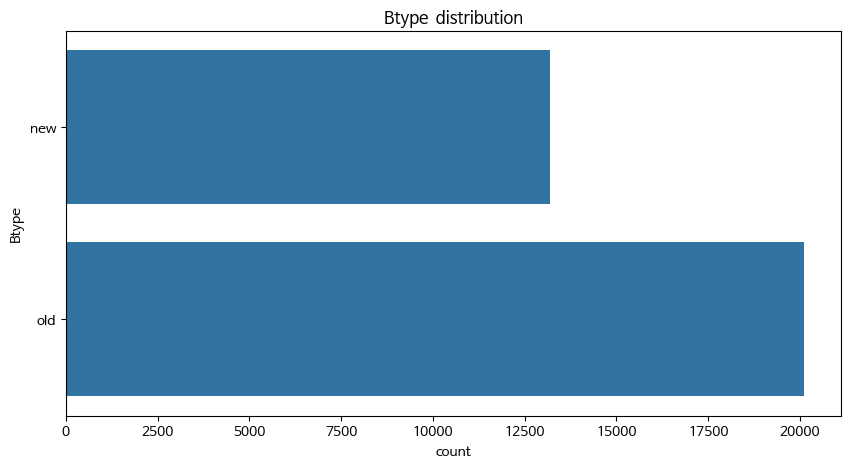

In [ ]:
# 범주형 변수 분포 확인 - Btype

plt.figure(figsize=(10, 5))
sns.countplot(y='Btype', data=df)
plt.title('Btype  distribution')
plt.show()


In [ ]:
# 범주형 변수 분포 확인 - 모든 변주형 범수
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df)
    plt.title(col + " distribution")
    plt.show()


In [ ]:
# 다변량 분석 - 산점도 행렬
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()
